In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import binomtest,chisquare,ttest_1samp,chi2_contingency,ttest_ind,f_oneway,pearsonr
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest,f_classif,f_regression
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# ici on a species,island,sex qui sont des variables discretes
# ici on a bill_length_mm ,  bill_depth_mm ,flipper_length_mm, body_mass_g qui sont des variables continues

<Axes: xlabel='island'>

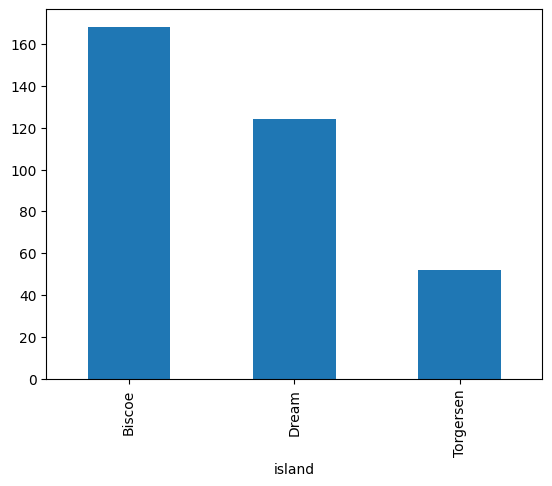

In [4]:
df['island'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

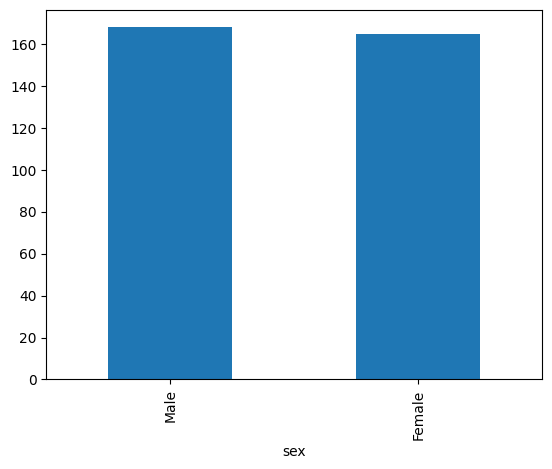

In [5]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='island', ylabel='sex'>

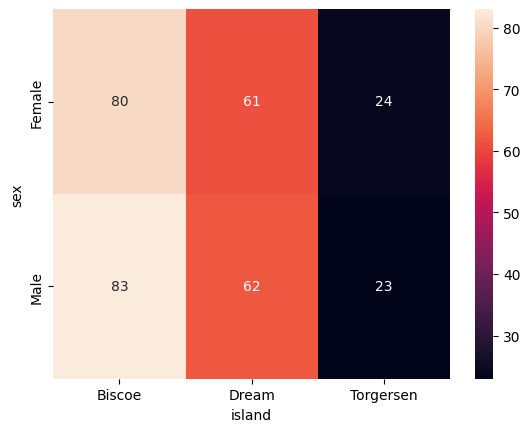

In [6]:
sns.heatmap(pd.crosstab(df['sex'],df['island']),annot=True)

In [7]:
pd.crosstab(df['sex'],df['island'])


island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


# variables continues

<Axes: xlabel='bill_length_mm', ylabel='Count'>

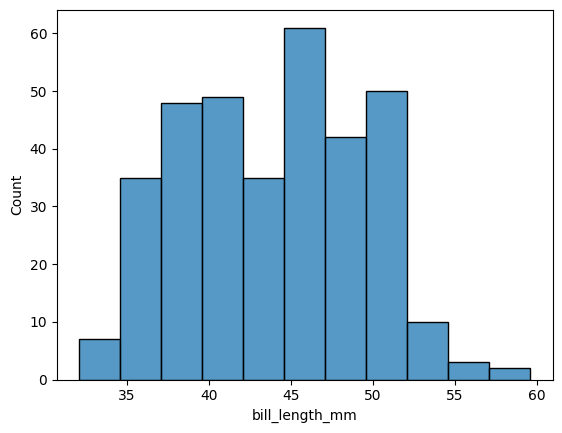

In [8]:
sns.histplot(data=df,x='bill_length_mm')

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

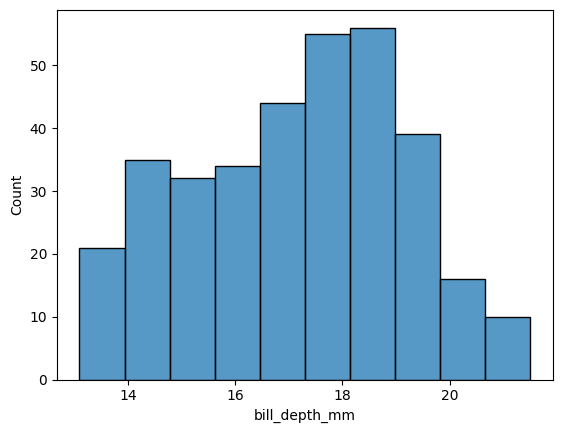

In [9]:
sns.histplot(data=df,x='bill_depth_mm')


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

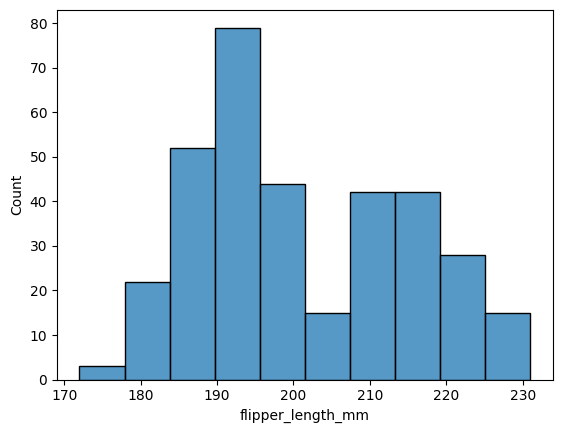

In [10]:
sns.histplot(data=df,x='flipper_length_mm')


<Axes: xlabel='body_mass_g', ylabel='Count'>

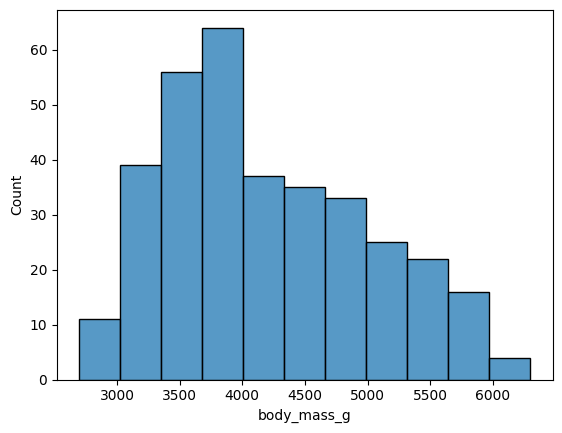

In [11]:
sns.histplot(data=df,x='body_mass_g')


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

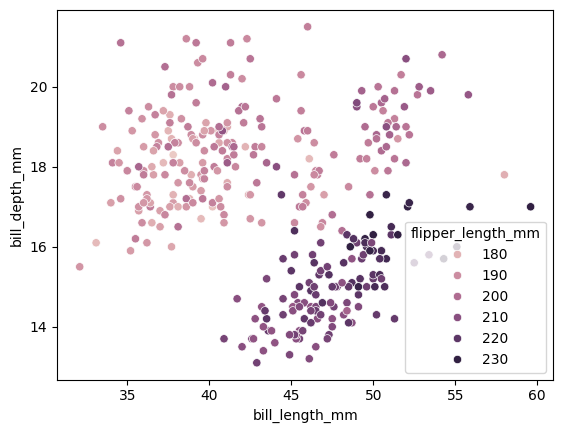

In [12]:
sns.scatterplot(data=df,x='bill_length_mm',y='bill_depth_mm',hue='flipper_length_mm')

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

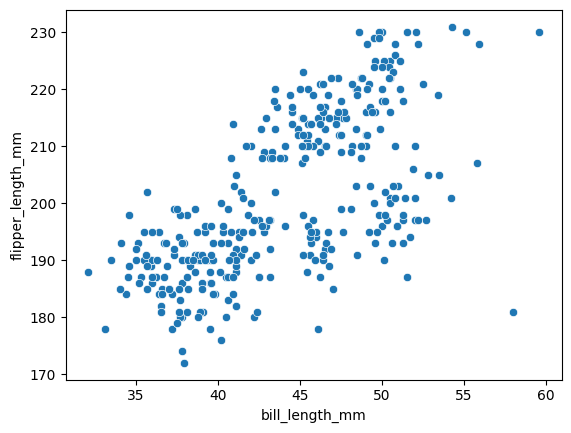

In [13]:
sns.scatterplot(data=df,x='bill_length_mm',y='flipper_length_mm')


<Axes: xlabel='bill_length_mm'>

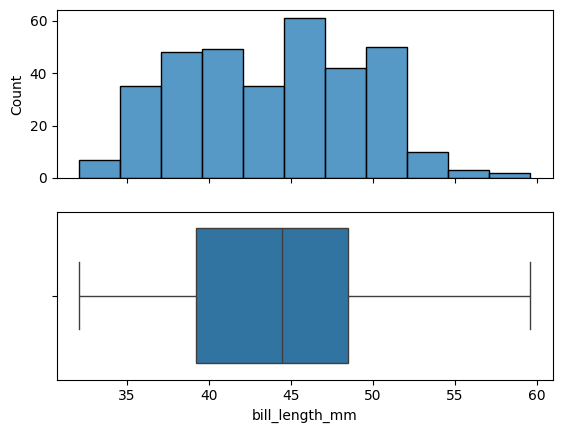

In [14]:
fig,ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=df,x='bill_length_mm',ax=ax[0])
sns.boxplot(data=df,x='bill_length_mm',ax=ax[1])

<Axes: xlabel='bill_depth_mm'>

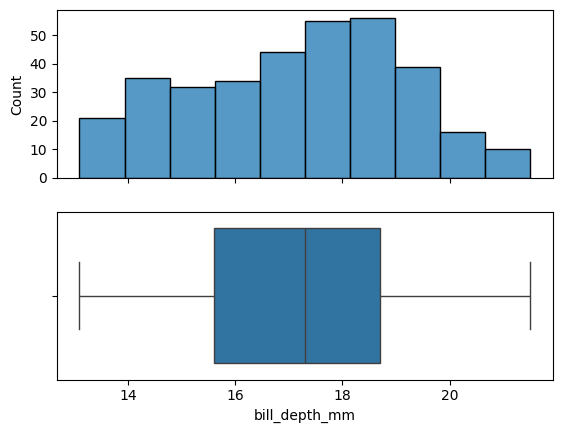

In [15]:
fig,ax=plt.subplots(2,1,sharex=True)
sns.histplot(data=df,x='bill_depth_mm',ax=ax[0])
sns.boxplot(data=df,x='bill_depth_mm',ax=ax[1])

<Axes: xlabel='flipper_length_mm'>

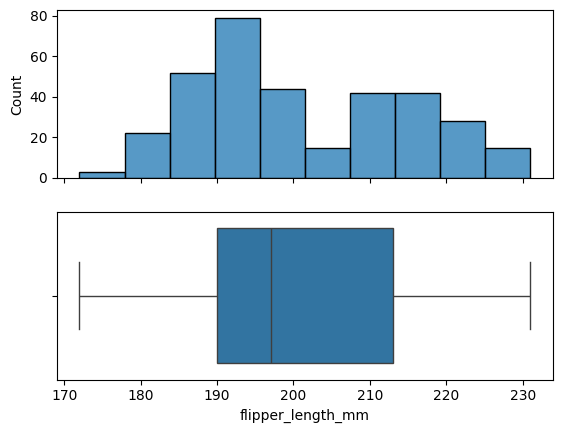

In [16]:
fig,ax=plt.subplots(2,1,sharex=True)
sns.histplot(data=df,x="flipper_length_mm",ax=ax[0])
sns.boxplot(data=df,x="flipper_length_mm",ax=ax[1])

<Axes: xlabel='body_mass_g'>

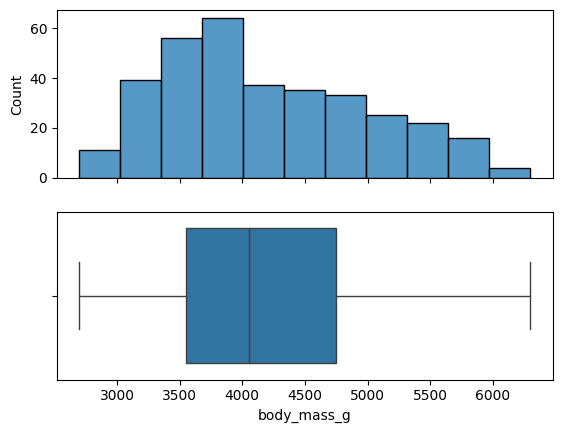

In [17]:
fig,ax=plt.subplots(2,1,sharex=True)
sns.histplot(data=df,x='body_mass_g',ax=ax[0])
sns.boxplot(data=df,x="body_mass_g",ax=ax[1])

<Axes: xlabel='island'>

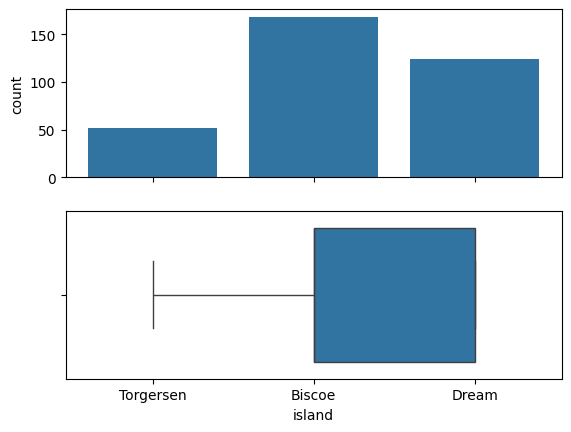

In [18]:
fig,ax=plt.subplots(2,1,sharex=True)
sns.countplot(data=df,x="island",ax=ax[0])
sns.boxplot(data=df,x='island',ax=ax[1])

<Axes: xlabel='sex'>

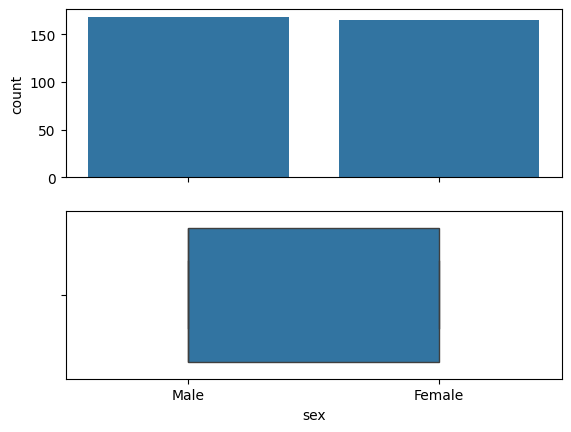

In [19]:
fig,ax = plt.subplots(2,1,sharex=True)
sns.countplot(data=df,x='sex',ax=ax[0])
sns.boxplot(data=df,x='sex',ax=ax[1])

2. GESTION DES NAN

In [20]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
df.dropna(axis=0,inplace=True)

In [23]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


ici jai decider de supprimer tous les valeurs manquantes pour chaque varibles car on avait que dix valeurs manquantes au grand max pour sex et 2 pour les autres du coup que dintroduire des biais en utilisant une methode dimputation avec une strategie jai preferer supprimer car perdre 10 lignes est mieux que davoir des donnees fausses

3. Gestion des Outliers :

In [25]:
# pour notre datasets et grace a la visualisations jai pas vue de outliers
#mais sil faut utiliser une methode ca sera la methode IQR comme exemple suite:

bill_depth = df['bill_depth_mm']
q1=bill_depth.quantile(0.25)
q3=bill_depth.quantile(0.75)

iqr=q3 - q1

lower_bound=q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


In [26]:
lower_bound

np.float64(10.95)

In [27]:
upper_bound

np.float64(23.349999999999998)

4. Encodage :

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [29]:
print(df['species'].value_counts())
df['island'].unique()


species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [30]:
species_order = ['Adelie', 'Chinstrap', 'Gentoo']
sex_order = ['Male', 'Female']
island_order =['Torgersen', 'Biscoe', 'Dream']

encoder = OneHotEncoder(
    categories=[species_order,sex_order,island_order],
    handle_unknown="ignore",
    sparse_output=False,
    drop='first'
)

encoder.fit_transform([['species','sex','island']])

/home/romaric420/VerificationConnaissance/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0.]])

5. Standardisation 

In [31]:
df_number = df.select_dtypes(include="number")

stand = MinMaxScaler()

stand.fit_transform(df_number)

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]], shape=(333, 4))

In [32]:
df_standart = pd.DataFrame(stand.fit_transform(df_number),columns=df_number.columns)
df_standart

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056
329,0.534545,0.142857,0.728814,0.597222
330,0.665455,0.309524,0.847458,0.847222
331,0.476364,0.202381,0.677966,0.694444


6. Feature Selection :

In [33]:
feature_selector = SelectKBest(score_func=f_classif,k=4)

In [40]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Exemple de données d'entrée
X = np.array([[1, 2], [3, 4], [5, 6]])

# Créer un objet PolynomialFeatures de degré 2
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

# Appliquer la transformation
X_poly = poly.fit_transform(X)

print("Données d'origine :")
print(X)

print("\nCaractéristiques polynomiales (degré 2) :")
print(X_poly)



Données d'origine :
[[1 2]
 [3 4]
 [5 6]]

Caractéristiques polynomiales (degré 2) :
[[ 1.  2.  2.]
 [ 3.  4. 12.]
 [ 5.  6. 30.]]


1. CHARGEMENT DES DONNÉES
Shape initiale : (891, 15)
Colonnes : ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

2. DÉTECTION ET SUPPRESSION DES OUTLIERS

Bornes des outliers :
----------------------------------------------------------------------
age                  : [   -6.69,    64.81]
fare                 : [  -26.72,    65.63]
sibsp                : [   -1.50,     2.50]
parch                : [    0.00,     0.00]

Lignes avant filtrage outliers : 891
Lignes après filtrage outliers : 598
Outliers supprimés : 293 (32.9%)

3. PRÉPARATION DES FEATURES (X) ET CIBLE (y)
X shape : (598, 4)
y shape : (598,)
Valeurs manquantes dans X :
age      149
fare       0
sibsp      0
parch      0
dtype: int64

Valeurs manquantes dans y : 0

4. IMPUTATION DES VALEURS MANQUANTES
Stratégie d'imputation : Moyenne (mean)
Valeurs manquantes après imputation : 0

5. STANDARDISATION (StandardScaler)
Avant sta

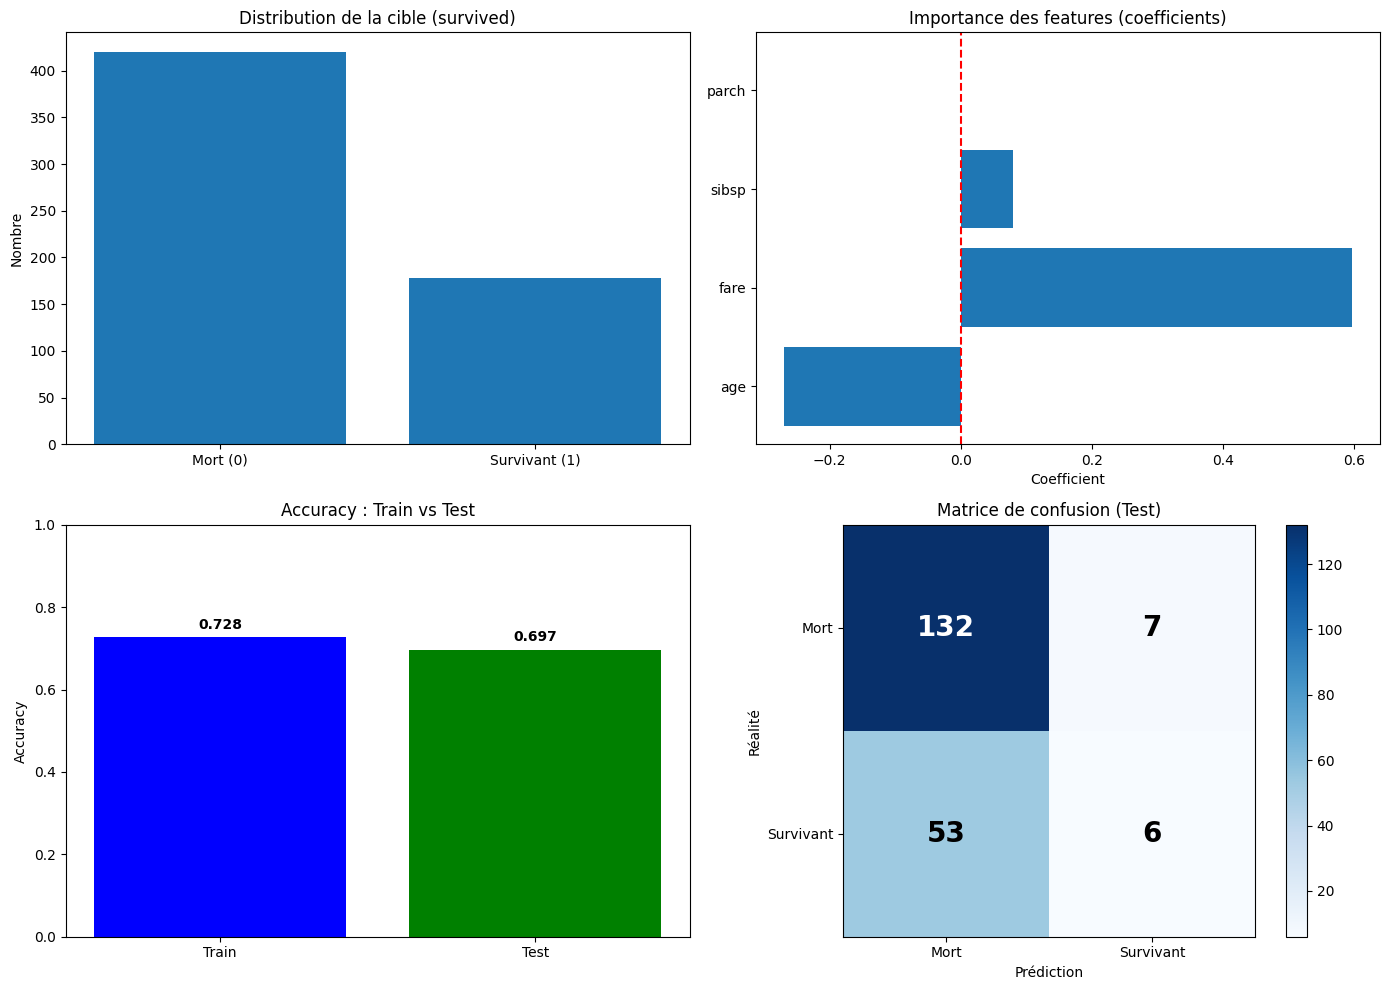


✅ RÉSUMÉ FINAL
Dataset initial : 891 lignes
Après nettoyage outliers : 598 lignes
Features utilisées : ['age', 'fare', 'sibsp', 'parch']
Méthode imputation : Moyenne
Méthode scaling : StandardScaler
Modèle : Logistic Regression
Accuracy finale (TEST) : 0.6970 (69.70%)


In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ============================================================================
# 1. CHARGER LES DONNÉES
# ============================================================================
print("="*70)
print("1. CHARGEMENT DES DONNÉES")
print("="*70)

titanic = sns.load_dataset("titanic")
print(f"Shape initiale : {titanic.shape}")
print(f"Colonnes : {titanic.columns.tolist()}")

# ============================================================================
# 2. DÉTECTION ET SUPPRESSION DES OUTLIERS (MÉTHODE IQR)
# ============================================================================
print("\n" + "="*70)
print("2. DÉTECTION ET SUPPRESSION DES OUTLIERS")
print("="*70)

# Colonnes numériques à analyser
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

# Calculer Q1, Q3 et IQR pour chaque colonne
Q1 = titanic[numeric_cols].quantile(0.25)
Q3 = titanic[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBornes des outliers :")
print("-" * 70)
for col in numeric_cols:
    print(f"{col:20s} : [{lower_bound[col]:8.2f}, {upper_bound[col]:8.2f}]")

# Créer un masque pour identifier les lignes SANS outliers
mask = ~((titanic[numeric_cols] < lower_bound) | (titanic[numeric_cols] > upper_bound)).any(axis=1)

# Appliquer le masque sur le DataFrame COMPLET (pas juste les colonnes numériques)
titanic_cleaned = titanic[mask].copy()

print(f"\nLignes avant filtrage outliers : {len(titanic)}")
print(f"Lignes après filtrage outliers : {len(titanic_cleaned)}")
print(f"Outliers supprimés : {len(titanic) - len(titanic_cleaned)} ({(len(titanic) - len(titanic_cleaned))/len(titanic)*100:.1f}%)")

# ============================================================================
# 3. PRÉPARATION X ET y (À PARTIR DU DATAFRAME NETTOYÉ)
# ============================================================================
print("\n" + "="*70)
print("3. PRÉPARATION DES FEATURES (X) ET CIBLE (y)")
print("="*70)

# Extraire X et y du DataFrame NETTOYÉ
X = titanic_cleaned[numeric_cols].copy()
y = titanic_cleaned['survived'].copy()

print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")
print(f"Valeurs manquantes dans X :")
print(X.isnull().sum())
print(f"\nValeurs manquantes dans y : {y.isnull().sum()}")

# ============================================================================
# 4. IMPUTATION DES VALEURS MANQUANTES
# ============================================================================
print("\n" + "="*70)
print("4. IMPUTATION DES VALEURS MANQUANTES")
print("="*70)

# Imputer les NaN avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Reconvertir en DataFrame pour garder les noms de colonnes
X_imputed = pd.DataFrame(X_imputed, columns=numeric_cols, index=X.index)

print("Stratégie d'imputation : Moyenne (mean)")
print(f"Valeurs manquantes après imputation : {X_imputed.isnull().sum().sum()}")

# ============================================================================
# 5. STANDARDISATION (SCALING)
# ============================================================================
print("\n" + "="*70)
print("5. STANDARDISATION (StandardScaler)")
print("="*70)

# Standardiser les données (moyenne=0, écart-type=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Reconvertir en DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=X_imputed.index)

print("Avant standardisation :")
print(X_imputed.describe().loc[['mean', 'std']])
print("\nAprès standardisation :")
print(X_scaled.describe().loc[['mean', 'std']])

# ============================================================================
# 6. GESTION DES NaN DANS y (au cas où)
# ============================================================================
print("\n" + "="*70)
print("6. VÉRIFICATION DE L'ALIGNEMENT X et y")
print("="*70)

# Supprimer les lignes où y est NaN
valid_indices = ~y.isna()
X_final = X_scaled[valid_indices]
y_final = y[valid_indices]

print(f"X_final shape : {X_final.shape}")
print(f"y_final shape : {y_final.shape}")
print(f"✅ X et y sont alignés : {X_final.shape[0] == y_final.shape[0]}")

# ============================================================================
# 7. SPLIT TRAIN / TEST
# ============================================================================
print("\n" + "="*70)
print("7. SPLIT TRAIN / TEST")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.33, 
    random_state=42,
    stratify=y_final  # Garde la même proportion de 0/1
)

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")

print(f"\nDistribution dans y_train :")
print(y_train.value_counts(normalize=True))
print(f"\nDistribution dans y_test :")
print(y_test.value_counts(normalize=True))

# ============================================================================
# 8. ENTRAÎNEMENT DU MODÈLE
# ============================================================================
print("\n" + "="*70)
print("8. ENTRAÎNEMENT DU MODÈLE (Logistic Regression)")
print("="*70)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("✅ Modèle entraîné avec succès")
print(f"\nCoefficients du modèle :")
for col, coef in zip(numeric_cols, model.coef_[0]):
    print(f"  {col:20s} : {coef:8.4f}")
print(f"  Intercept : {model.intercept_[0]:.4f}")

# ============================================================================
# 9. PRÉDICTIONS ET ÉVALUATION
# ============================================================================
print("\n" + "="*70)
print("9. PRÉDICTIONS ET ÉVALUATION")
print("="*70)

# Prédictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy sur TRAIN : {accuracy_train:.4f} ({accuracy_train*100:.2f}%)")
print(f"Accuracy sur TEST  : {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")

# ============================================================================
# 10. VISUALISATION (BONUS)
# ============================================================================
print("\n" + "="*70)
print("10. VISUALISATION DES RÉSULTATS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Graphique 1 : Distribution de y
axes[0, 0].bar(['Mort (0)', 'Survivant (1)'], y_final.value_counts().sort_index())
axes[0, 0].set_title('Distribution de la cible (survived)')
axes[0, 0].set_ylabel('Nombre')

# Graphique 2 : Importance des features (coefficients)
axes[0, 1].barh(numeric_cols, model.coef_[0])
axes[0, 1].set_title('Importance des features (coefficients)')
axes[0, 1].set_xlabel('Coefficient')
axes[0, 1].axvline(0, color='red', linestyle='--')

# Graphique 3 : Comparaison Train vs Test
axes[1, 0].bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
axes[1, 0].set_title('Accuracy : Train vs Test')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim([0, 1])
for i, v in enumerate([accuracy_train, accuracy_test]):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Graphique 4 : Matrice de confusion (simple)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
im = axes[1, 1].imshow(cm, cmap='Blues')
axes[1, 1].set_title('Matrice de confusion (Test)')
axes[1, 1].set_xlabel('Prédiction')
axes[1, 1].set_ylabel('Réalité')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_yticks([0, 1])
axes[1, 1].set_xticklabels(['Mort', 'Survivant'])
axes[1, 1].set_yticklabels(['Mort', 'Survivant'])

# Ajouter les valeurs dans la matrice
for i in range(2):
    for j in range(2):
        axes[1, 1].text(j, i, cm[i, j], ha='center', va='center', 
                        color='white' if cm[i, j] > cm.max()/2 else 'black',
                        fontsize=20, fontweight='bold')

plt.colorbar(im, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# ============================================================================
# RÉSUMÉ FINAL
# ============================================================================
print("\n" + "="*70)
print("✅ RÉSUMÉ FINAL")
print("="*70)
print(f"Dataset initial : {len(titanic)} lignes")
print(f"Après nettoyage outliers : {len(titanic_cleaned)} lignes")
print(f"Features utilisées : {numeric_cols}")
print(f"Méthode imputation : Moyenne")
print(f"Méthode scaling : StandardScaler")
print(f"Modèle : Logistic Regression")
print(f"Accuracy finale (TEST) : {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print("="*70)



In [46]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger le dataset
titanic = sns.load_dataset("titanic")

# Sélectionner colonnes numériques
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

# ✅ CORRECTION : Supprimer les NaN sur le DataFrame COMPLET
titanic_cleaned = titanic.dropna(subset=numeric_cols + ['survived'])

# X et y du MÊME DataFrame
X = titanic_cleaned[numeric_cols]
y = titanic_cleaned['survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Score SANS prétraitement : {accuracy:.4f}")

Score SANS prétraitement : 0.6822


In [50]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger le dataset
titanic = sns.load_dataset("titanic")

# Colonnes numériques
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

# 1. Détecter et supprimer les outliers (IQR)
Q1 = titanic[numeric_cols].quantile(0.25)
Q3 = titanic[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ~((titanic[numeric_cols] < lower_bound) | (titanic[numeric_cols] > upper_bound)).any(axis=1)
titanic_cleaned = titanic[mask].copy()

# 2. X et y
X = titanic_cleaned[numeric_cols]
y = titanic_cleaned['survived']

# 3. Imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# ✅ GARDER L'INDEX ORIGINAL
X_imputed = pd.DataFrame(X_imputed, columns=numeric_cols, index=X.index)

# 4. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
# ✅ GARDER L'INDEX ORIGINAL
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=X.index)

# 5. Supprimer les NaN dans y (maintenant les index correspondent)
valid_mask = ~y.isna()
X_final = X_scaled[valid_mask]
y_final = y[valid_mask]

# Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Score AVEC prétraitement : {accuracy:.4f}")

Score AVEC prétraitement : 0.7071
